# Regularization in Machine Learning

It is a statistical method to reduce errors caused by **overfitting** on training data, by adding a penalty term to the cost function in the model. This discourages complex models with high coefficients, promoting simpler and more generalizable solutions. Regularization helps improve a model's performance on unseen data and enhances its overall robustness.

## Techniques of Regularization

There are mainly two types of regularization techniques, which are given below:

1. **Ridge Regression (L2 Regularization)**
2. **Lasso Regression (L1 Regularization)**

each influencing the model's behavior in different ways.

# Ridge Regression (L2 Regularization):

is a statistical regularization technique. It corrects for overfitting on training data for linear regression models.

In this technique, the cost function is altered by adding the penalty term (lambda (λ) or alpha(α)- as per Ridge Class) to it. The amount of bias added to the model is called Ridge Regression penalty. We can calculate it by multiplying with the lambda/alpha to the squared weight of each individual feature.


The equation for the cost function in ridge regression will be:

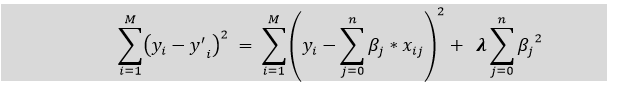

In the above equation, the penalty term regularizes the coefficients of the model, and hence ridge regression reduces the amplitudes of the coefficients that decreases the complexity of the model.

It can be noted that, if the values of **λ tend to zero**, the equation becomes the **Cost Function of the Linear Regression model**.


## Why do we need Ridge Regression?

General Linear or Polynomial rRegression will fail if there is high collinearity between the independent variables. In such cases, Ridge regression can be used. It effectively addresses the problems if we have more parameters than samples.

**Note:**

*Since, Ridge Regression does not perform feature selection, it cannot reduce model complexity by eliminating features. However, it can **shrink high feature weights (i.e., coefficients)** across the model using the L2 penalty term. This reduction in complexity helps make model predictions more stable by preventing any one or more features from excessively influencing the model's output.*



## How Ridge Regression Regularization balances Bias-Variance Tradeoff?

In machine learning terms, Ridge Regression amounts to adding bias into a model for the sake of decreasing that model’s variance. 

In other words, models regularized through Ridge Regression produce less accurate predictions on training data (higher bias) but more accurate predictions on test data (lower variance). This is the Bias-Variance Tradeoff. 

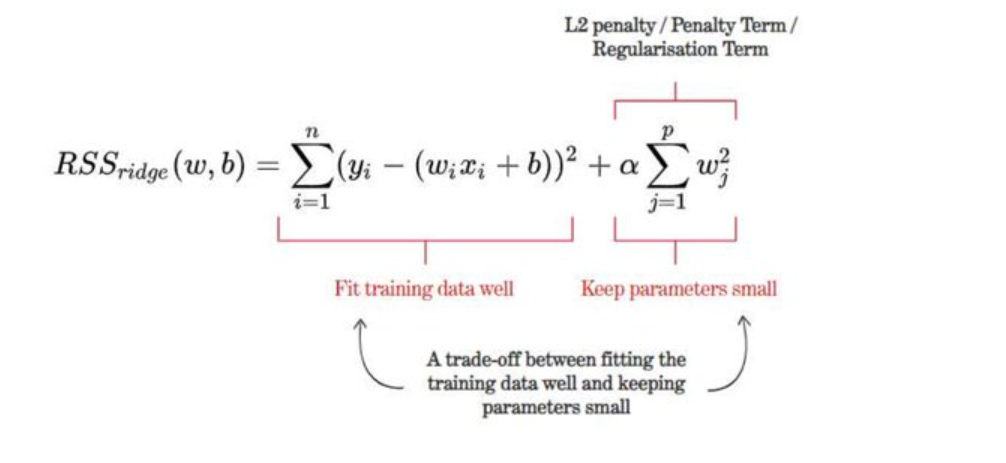

Through Ridge Regression, users accept a loss in training accuracy (higher bias) to enhance a given model's generalization (lower variance). In this way, increasing bias can help improve overall model performance.

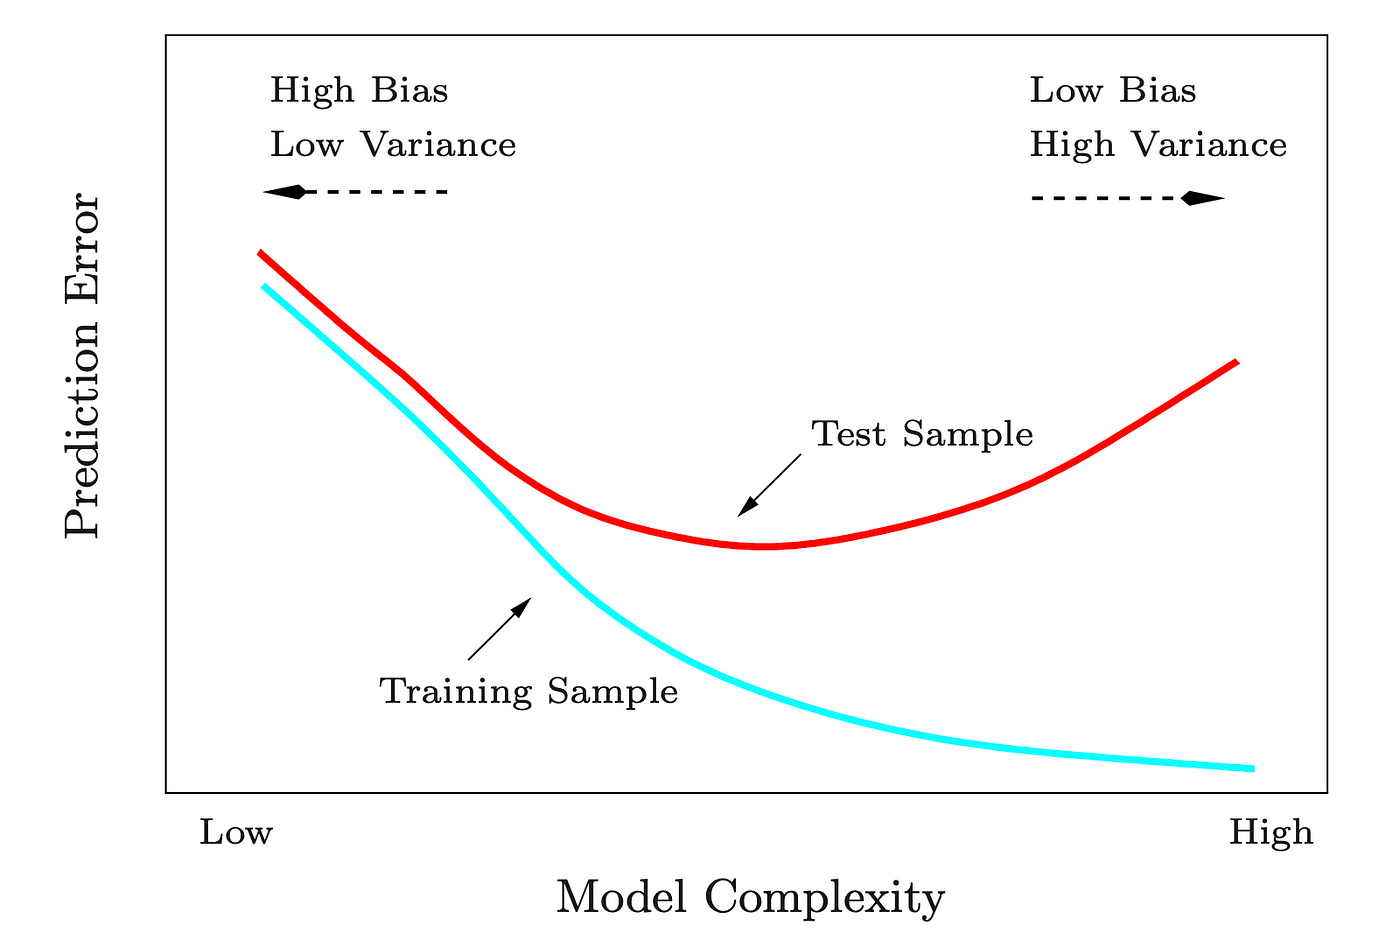



## Simple Linear Regression Vs Simple Ridge Regression

### Creating Dataset

Creating a Dataset with One Input and One Target Column using sklearn's make_regression class.

In [2]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [9]:
input_,target_ = make_regression(n_samples=250, n_features=1, n_informative=3, n_targets=1, noise=20)

### Plotting the dataset

Text(0, 0.5, 'target')

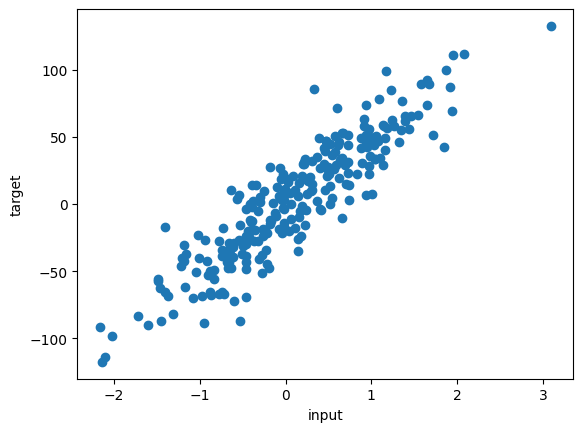

In [10]:
plt.scatter(input_,target_)
plt.xlabel('input')
plt.ylabel('target')

### Splitting data into train and test datasets


In [11]:
from sklearn.model_selection import train_test_split

In [15]:
train_input, test_input, train_target, test_target = train_test_split(input_, target_, test_size = 0.2 , random_state = 42)

In [16]:
train_input.shape

(200, 1)

### Let's apply LinearRegression on our data

In [26]:
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()
lr.fit(train_input, train_target)
print("Linear Regression m", lr.coef_)
print("Linear Regression b", lr.intercept_)

Linear Regression m [47.57605212]
Linear Regression b -0.9031070913190744


### Now, let's apply Ridge Regression on our data

In [31]:
from sklearn.linear_model import Ridge

In [32]:
rr = Ridge(alpha = 0.1)
rr.fit(train_input, train_target)
print("Linear Regression m", rr.coef_)
print("Linear Regression b", rr.intercept_)

Linear Regression m [47.54630899]
Linear Regression b -0.9007921870911324


## Building our own Simple Ridge Regression Class.

In [18]:
class RidgeRegressionSimpleLR:
    
    def __init__(self, alpha = 0.1):
        self.alpha = alpha
        self.m = None
        self.b = None
        
    
    # Creating 'fit' Function
    def fit(self, train_input, train_target):
        
        # Calculating slope of the line (m):
        numerator = 0
        denominator = 0
        
        for i in range(train_input.shape[0]):
            
            numerator = numerator + ((train_target[i] - train_target.mean()) * (train_input[i] - train_input.mean()))
            denominator = denominator + ((train_input[i] - train_input.mean()) * (train_input[i] - train_input.mean()))
            
            self.m = numerator/ (denominator + self.alpha)
        
        # Calculating coefficent of the line(b):
        self.b = train_target.mean() - (self.m * train_input.mean())
        
    @property
    def coefficients(self):
        if self.m is not None:
            return self.m
        else:
            print("Model not fitted yet.")
            return None

    @property
    def intercept(self):
        if self.b is not None:
            return self.b
        else:
            print("Model not fitted yet.")
            return None
        
        
    # Creating 'predict' Function
    def predict(self, test_input):
        return self.m * test_input + self.b

In [20]:
rrs = RidgeRegressionSimpleLR()

In [21]:
rrs.fit(train_input, train_target)

In [25]:
print("Ridge Regression m:",rrs.m)
print("Ridge Regression b:",rrs.b)

Ridge Regression m: [47.54630899]
Ridge Regression b: [-0.90079219]


Exactly same m and b value of our made RidgeRegressionSimpleLR Class with the sklearn's Ridge Regression Class.

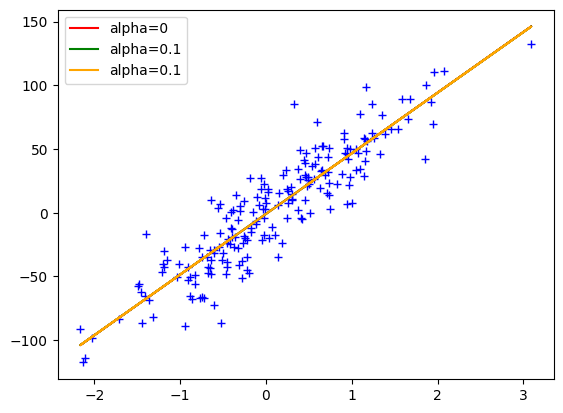

In [34]:
plt.plot(train_input, train_target,'b+')
plt.plot(train_input,lr.predict(train_input),color='red',label='alpha=0')
plt.plot(train_input,rr.predict(train_input),color='green',label='alpha=0.1')
plt.plot(train_input,rrs.predict(train_input),color='orange',label='alpha=0.1')
plt.legend()
plt.show()

All the lines are merging each other. So, let's check the R2 scores for each model.

In [35]:
lr_pred = lr.predict(test_input)
rr_pred = rr.predict(test_input)
rrs_pred = rrs.predict(test_input)

In [36]:
print("LR R2",r2_score(test_target,lr_pred))

print("RR R2",r2_score(test_target,rr_pred))

print("RRS R2",r2_score(test_target,rrs_pred))

LR R2 0.7964257686608717
RR R2 0.7964181196203491
RRS R2 0.7964181196203491


LinarRegression is performing slightly better because we are balancing Bias-Variance Tradeoff from Ridge Regression and our model.

## Let's play with Alpha

In [49]:
def RidgeRegression(alpha):

    rr = Ridge(alpha=alpha)
    rr.fit(train_input, train_target)
    print(rr.coef_)
    print(rr.intercept_)
    return rr

In [50]:
rr1 = RidgeRegression(10)

[44.77509506]
-0.6851089773373293


In [51]:
rr2 = RidgeRegression(100)

[29.26745952]
0.5218482252435241


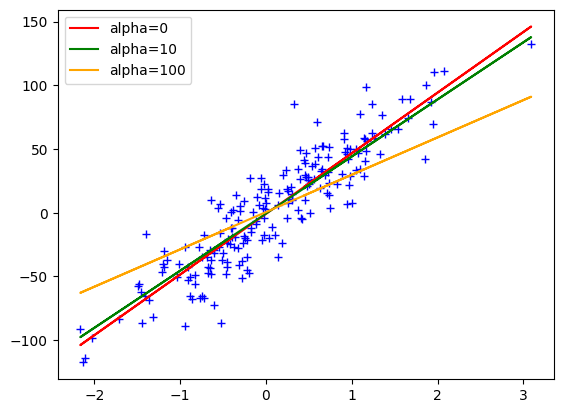

In [52]:
plt.plot(train_input, train_target,'b+')
plt.plot(train_input,rr.predict(train_input),color='red',label='alpha=0')
plt.plot(train_input,rr1.predict(train_input),color='green',label='alpha=10')
plt.plot(train_input,rr2.predict(train_input),color='orange',label='alpha=100')
plt.legend()
plt.show()

Observations made are:

* **Low Value of alpha** causes **overfitting**
* **High Value of alpha** causes **underfitting**

Above, I have covered Ridge Regression and we build and compared our own RidgeRegressionSimpleLR Class for 2D data.

Now, let’s explore Nth Dimension dataset, using Ridge Regression and upgrade our RidgeRegressionSimpleLR Class.

## Ridge Regression for Nth Dimension Data

### Importing Dataset

In this implementation I am using Diabetes Data of sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

In [53]:
from sklearn.datasets import load_diabetes
import numpy as np

In [54]:
(inputs, target) = load_diabetes(return_X_y = True) 

print('inputs.shape:' , inputs.shape)
print('target.shape:' ,target.shape)

inputs.shape: (442, 10)
target.shape: (442,)


### Splitting data into train and test datasets


In [56]:
train_inputs, test_inputs, train_target, test_target = train_test_split(inputs, target, test_size = 0.2 , random_state = 42)

In [57]:
print('train_inputs:' ,train_inputs)
print("\n")
print('train_.shape:', train_inputs.shape)

train_inputs: [[ 0.07076875  0.05068012  0.01211685 ...  0.03430886  0.02736405
  -0.0010777 ]
 [-0.00914709  0.05068012 -0.01806189 ...  0.07120998  0.00027248
   0.01963284]
 [ 0.00538306 -0.04464164  0.04984027 ... -0.00259226  0.01703607
  -0.01350402]
 ...
 [ 0.03081083 -0.04464164 -0.02021751 ... -0.03949338 -0.01090325
  -0.0010777 ]
 [-0.01277963 -0.04464164 -0.02345095 ... -0.00259226 -0.03845972
  -0.03835666]
 [-0.09269548 -0.04464164  0.02828403 ... -0.03949338 -0.00514219
  -0.0010777 ]]


train_.shape: (353, 10)


Note: It is very advisable to Standarize your dataset before applying Linear Models to reduce Time Complexity by approaching fast towards the decent.

Here, I'm not applying DataStandardization because the dataset is already in Similar Range of all the axis.


In [58]:
rrm = Ridge(alpha=0.1,solver='cholesky')

In [62]:
rrm.fit(train_inputs, train_target)
print("Ridge Regression coefficients: ", rrm.coef_)
print("Ridge Regression intercept: ", rrm.intercept_)

Ridge Regression coefficients:  [  42.85566976 -205.49431899  505.08903304  317.0932049  -108.50026183
  -86.23673333 -190.36318008  151.70708637  392.28931896   79.9081772 ]
Ridge Regression intercept:  151.45857456679613


In [63]:
y_pred = rrm.predict(test_inputs)
r2_score(test_target,y_pred)

0.46085219464119265

## Building our own Multiple Ridge Regression Class.

In [67]:
class RidgeRegressionMultipleLR:
    
    def __init__(self, alpha = 0.1):
        self.alpha = alpha
        self.coeff = None
        self.intcpt = None
    
    
    # Creating 'fit' Function
    def fit(self, train_inputs, train_target):
        
        # The numpy.insert() function inserts values along the mentioned axis before the given indices.
        train_inputs = np.insert(train_inputs, 0, 1, axis = 1) # Syntax : numpy.insert(array, object, values, axis = None) 
        
        # Creating an identity matrix with dimensions matching the number of features in train_inputs
        I = np.identity(train_inputs.shape[1])

        # Setting the first element of the identity matrix to 0, assuming it corresponds to the intercept term
        I[0][0] = 0

        # Calculating betas of the best fit line
        betas = np.linalg.inv(np.dot(train_inputs.T, train_inputs) + self.alpha * I).dot(train_inputs.T).dot(train_target)
        
        # Calculating intercept of the line (beta-not):
        self.intcpt = betas[0]
        
        
        # Calculating coefficent of the line(all betas):
        self.coeff = betas[1:]
        
    @property
    def coefficients(self):
        if self.coeff is not None:
            return self.coeff
        else:
            print("Model not fitted yet.")
            return None

    @property
    def intercept(self):
        if self.intcpt is not None:
            return self.intcpt
        else:
            print("Model not fitted yet.")
            return None
        
        
    # Creating 'predict' Function
    def predict(self, test_inputs):
        return np.dot(test_inputs, self.coeff) + self.intcpt

In [73]:
rrmlr = RidgeRegressionMultipleLR()
rrmlr.fit(train_inputs,train_target)
rrmlr_pred = rrmlr.predict(test_inputs)
print("RidgeRegressionMultipleLR R2 Score: ",r2_score(test_target,rrmlr_pred))
print("\n")
print("RidgeRegressionMultipleLR Coefficients: ", rrmlr.coefficients)
print("\n")
print("RidgeRegressionMultipleLR Intercept: ",rrmlr.intercept)

RidgeRegressionMultipleLR R2 Score:  0.4608521946411924


RidgeRegressionMultipleLR Coefficients:  [  42.85566976 -205.49431899  505.08903304  317.0932049  -108.50026183
  -86.23673333 -190.36318008  151.70708637  392.28931896   79.9081772 ]


RidgeRegressionMultipleLR Intercept:  151.45857456679605


Same R2 SCore, Cofficients and Interecept values.

Hence, our model is working fine.

## Following things to note:

### Why `solver = ‘cholesky’`?

Because ‘cholesky’ uses the standard `scipy.linalg.solve` function to obtain a closed-form solution for solving linear systems.

And in our model we are using `np.linalg.inv` to obtain an OLS Function for our model.

### Why I[0][0] = 0?:

The line `I[0][0] = 0` ensures that the intercept term is not regularized.

By setting the first element of the identity matrix to 0, we exclude the intercept from the penalty term because alpha is multiply with coefficients.

This is common practice in Ridge Regression to prevent the intercept from being overly penalized.

*Note: While this article focuses on Regularization of Linear Regression models, Ridge Regression may also be applied in Logistic Regression.*

Note: I have built a custom class to facilitate a better understanding of Ridge Regression Model. Consequently, I would recommend utilizing the scikit-learn library for the development of your model.

> Stay tuned for other Gradient Descent Models - Rigid Regression and Don't forget to **Star** and **Share** this Github Repository.